### 3. Home credit default risk
- Start Here: A Gentle Introduction

1. 소개
    - 이 노트는 초심자를 위해 만들어졌으므로 복잡한 모델이나 많은 데이터 결합을 피한다.


2. 대회 목적
    - 과거의 대출 신청 데이터를 이용하여 신청자가 대출을 상환할 수 있는지 예측한다.


3. Binary classification
    - 상환=0, 상환 못함=1


4. Data
 - application_train/application_test
   : 각 대출 신청 정보
 - bure
   : 다른 금융기관의 고객의 예전 신용
 - bure_balance
   : 예전 신용도 월별 데이터
 - previous_application
   : 예전 대출 신청
 - POS_CASH_BALANCE
   : 예전 대출 신청 월별 데이터
 - credit_card_balance
   : 신용카드 월별 데이터
 - installments_payment
   : 예전 대출 지불 내역







#### 1. Imports

In [100]:

import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Read in data

In [101]:
print(os.listdir("C:/Users/LEEKYOUNGSEON/Study_VS/kaggle/3. Home_credit/A Gentle Introduction/inputdata/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


이용 가능한 파일 리스트들을 확인한다. 
확인 후에는 training data, testing data 순으로 불러온다.

In [102]:
app_train=pd.read_csv('C:/Users/LEEKYOUNGSEON/Study_VS/kaggle/3. Home_credit/A Gentle Introduction/inputdata/application_train.csv')
print('Training data shape: ', app_train.shape)
#.shape 몇*몇 행렬로 이루어져 있는지 나타내기
app_train.head()
#위에 5줄만 확인


Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


트레이닝 데이터는 307511개의 관찰값을 가지고 traget 포함 122개의 feature가 있다.

In [103]:
app_test=pd.read_csv('C:/Users/LEEKYOUNGSEON/Study_VS/kaggle/3. Home_credit/A Gentle Introduction/inputdata/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


테스트 데이터는 48744개의 행이 있고 열은 트레이닝 데이터에서 target이 빠져서 121개 있다.

#### 3. Exploratory Data Analysis
- EDA는 데이터 내에서의 추세, 이상징후, 패턴, 관계 등을 알아낸다. 이 과정에서 흥미로운 영역이 생긴다면 특정 영역으로 좁혀서 분석할 수 있다.

#### 3.1. Examine the Distribution of the Target Column
- 일단 각 category에 속하는 대출의 수를 조사한다.

In [104]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

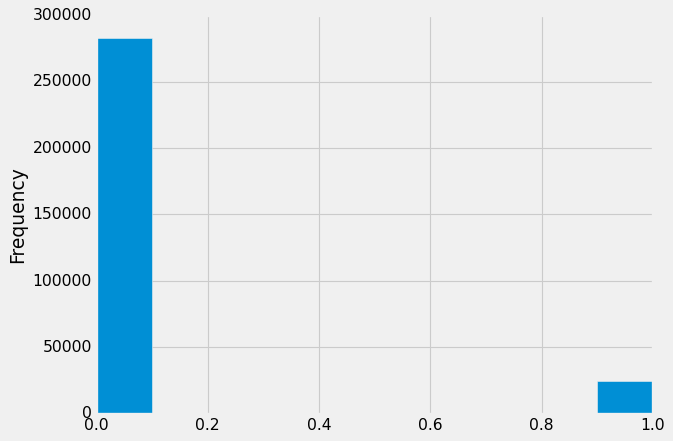

In [105]:
app_train['TARGET'].astype(int).plot.hist();
#astype(int) 배열의 모든 요소를 정수로 변환한다.
#plot.hist 히스토그램 그래프를 그린다.

- 이 그래프를 보면 상환한 대출이 미상환 대출보다 훨씬 많으므로 불균형한 class문제임을 알 수 있다. 불균형을 반영하기 위해 가중치를 붙일 수 있다. 

#### 3.2.Examine Missing Values
- 결측치의 수와 비율을 확인한다.    


In [106]:
#결측치를 계산하기 위해 함수를 만든다.
def missing_values_table(df):
    #총 결측치
    mis_val=df.isnull().sum()

    #결측치 비율
    mis_val_percent =100*df.isnull().sum()/len(df)

    #결과로 표 만들기
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)

    #열 이름 다시짓기
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'Missing Values', 1:'% of Total Values'})
    mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False).round(1)
    #여긴 아직 이해 못한듯

    # 요약 정보 print하기
    print("Your selected dataframe has "+str(df.shape[1])+" columns.\n" "There are "+str(mis_val_table_ren_columns.shape[0])+" columns that have missing values")

        #결측치 dataframe을 return

    return mis_val_table_ren_columns










- 여기서 IndentationError: unexpected indent 에러가 생겼는데 들여쓰기를 잘못하면 생기는 에러라고 한다.  
- 또한 아래에서 함수를 실행하려고 했을 때, UnboundLocalError: local variable 'mis_val_table_ren_columns' referenced before assignment 에러가 발생하였는데 이는 mis_val_table_ren_columns에 대해 지정해주는 줄을 빠뜨려서 에러가 생겼다.
- 그대로 따라했더니 Your selected dataframe has (a,122) 이런식으로 나왔다. 그래서 df.shape ->df.shape[1]로 수정해주었다.

In [107]:
#결측치 통계량
missing_values=missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


- 머신러닝 모델을 만들 때는 이런 결측치를 채워야 한다. 이후 결측치 처리를 위해 XGBoost 모델을 이용할 것이다. 결측치 비율이 높은 열을 삭제할 수도 있지만 도움이 될 수도 있기 때문에 일단 유지한다

#### 3.3.Column Types
- 각 데이터유형의 열 수를 알아본다. 

In [108]:
#타입별 column 수
app_train.dtypes.value_counts()
#dtypes는 타입 확인, value_counts는 타입별 column 수 확인

float64    65
int64      41
object     16
dtype: int64

In [109]:
#object column에서 각 class의 수
app_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)
#select_dtypes는 특정 데이터타입 추출하기
#pd.Series는 리스트 값들에 index 불여서 출력
#nunique는 unique 값의 개수를 센다.
#qpply axis=0은 열, axis=1은 행

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

- 이런 categorical variable을 다루는 방법을 찾자!

#### 4.Encoding Categorical Variables
- 머신러닝 모델은 categorical variable를 처리할 수 없으므로 이 변수들을 숫자로 인코딩한다. 두 가지 방법이 있다.

1. Label encoding
 : 각 category를 정수로 할당한다. ex)CEO=0, 매니저=1, 사원=2
2. One-hot encoding
 : 하나의 1과 나머지0으로 이루어진 벡터를 할당한다. ex)CEO=[100], 매니저=[010], 사원=[001]
3. 둘 중에 무엇을 고를 것인가?
- Label encoding은 우리가 원하지 않는 가중치를 할당할 수도 있다. category가 두 개만 있는 경우는 괜찮지만 두 개를 초과할 경우 one-hot encoding이 안전하다.
- one-hot encoding의 단점은 feature의 수가 폭발적으로 증가할 수 있다. 이 문제를 해결하려면 PCA와 같은 차원 축소 방법을 이용해야 한다.
- 이 노트에서는 category가 2개 이하일 때 label encoding을 이용하고 2개를 초과하면 one-hot encoding을 이용한다. (또한 차원 축소는 이용하지 않는다.)

##### 4.1 Label Encoding and One-Hot Encoding
- category가 2개 이하일 때 label encoding을 이용하고 2개를 초과하면 one-hot encoding을 이용한다.
- label encoding은 Scikit-Learn LabelEncoder를 이용한다.
- one-hot encoding은 pandas get_dummies(df)를 이용한다.

- label encoding 부터 시작

In [110]:
#label endoder object 만들기
le=LabelEncoder()
le_count=0

#column 사이를 반복한다.
for col in app_train:
    if app_train[col].dtype=='object':
        #만약 2개 이하의 unique category가 있다면
        if(len(list(app_train[col].unique())))<=2:
            le.fit(app_train[col])
            #training 과 testing data 둘 다 바꿔준다.
            app_train[col]=le.transform(app_train[col])
            app_test[col]=le.transform(app_test[col])

            le_count+=1

print('%d columns were label encoded.' %le_count)

3 columns were label encoded.


- one-hot encoding 시작

In [111]:
# one-hot encoding of categorical variables
app_train=pd.get_dummies(app_train)
app_test=pd.get_dummies(app_test)

print('Training Features shape: ',app_train.shape)
print('Testing Features shape: ',app_test.shape)

print(app_train.head())

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)
   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002       1                   0             0                1   
1      100003       0                   0             0                0   
2      100004       0                   1             1                1   
3      100006       0                   0             0                1   
4      100007       0                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513

##### 4.2.Aligning Training and Testing Data
- training 과 testing에 모두 동일한 feature(column)이 있어야 한다. training data에서 tesing data에 없는 열을 추출한다. 
- 열을 기준으로 데이터 프레임을 정렬하도록 axis=1 설정한다.

- 밑에서 app_train['TARGET']에서 KeyError: 'TARGET'에러가 났는데, 처음부터 다시 다 실행해보니까 해결되었다.(?) 

In [112]:
train_labels=app_train['TARGET']
# training과 testing 둘 다에 있는 열만 남김
app_train,app_test=app_train.align(app_test,join='inner',axis=1)

# 타겟은 다시 추가
app_train['TARGET']=train_labels

print('Training Features shape: ',app_train.shape)
print('Testing Features shape: ',app_test.shape)


Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


- training data와 testing data는 같은 feature가 있다.(타겟 빼고!) 이제 머신러닝 가능하다.
- feature 수가 크게 증가하여 언젠가는 차원 축소가 필요할 수도 있다.

#### 5.Back to Exploratory Data Analysis

##### 5.1.Anomalies
- 데이터 내의 이상 현상을 찾아보자. decscribe method에서 column의 통계를 보면 된다.
- DAYS_BIRTH column의 숫자는 현재 대출 신청과 비교하여 기록되므로 음수이다. 이 통계량을 년 단위로 보려면 -1을 곱하고 1년의 일 수(365)로 나누면 된다. 

In [113]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

- 딱히 DAYS_BIRTH에서 특이값은 보이지 않는다.

In [114]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

- 최대값에서 특이값이 존재하는 것처럼 보인다. 그래프를 그려보자.

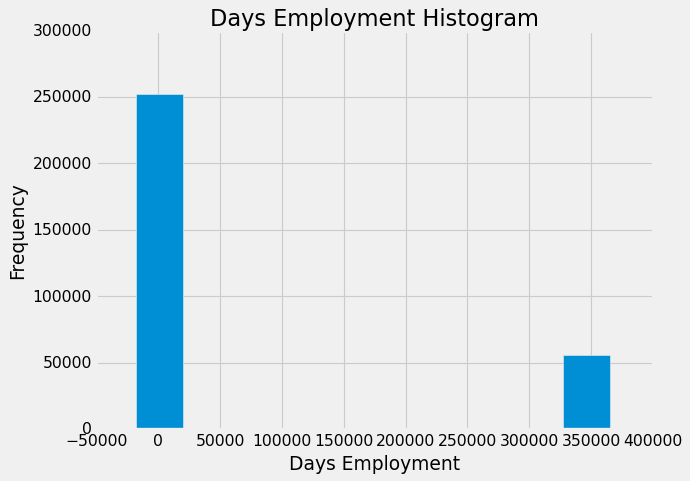

In [115]:
app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram');
plt.xlabel('Days Employment');

- 최대값이 특이값이다!
- 그렇다면 각 부분을 나눠서 채무 불이행의 비율이 어떤지 보자.

In [116]:
anom=app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom=app_train[app_train['DAYS_EMPLOYED']!=365243]

print('The non-anomalies default on %0.2f%% of loans'%(100*non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans'%(100*anom['TARGET'].mean()))
print('There are %d anomalous days of employment'%len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


- 특이값에서 채무 불이행 비율이 낮다.
- 안전한 방법은 특이값을 결측값으로 설정하고 머신러닝 전에 imputation을 이용하여 채우는 것이다.
- 해결방법으로 우리는 특이값을 숫자 대신 이것이 특이값인지 나타내는 새 boolean column으로 채울 것이다.

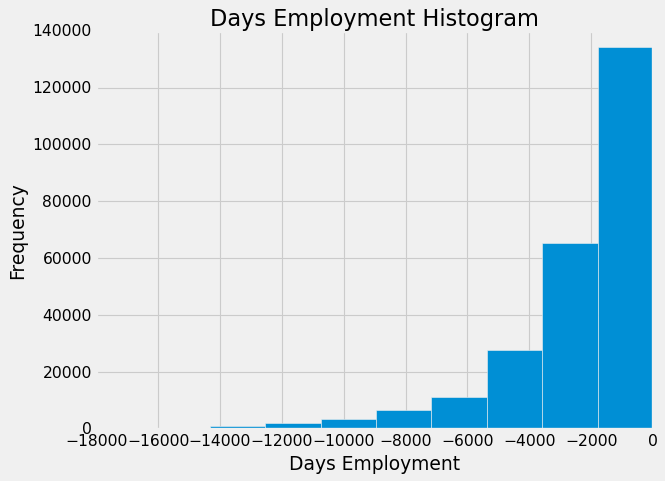

In [117]:
# Create an anomalous flag column
app_train['DATS_EMPLOYED_ANOM']=app_train["DAYS_EMPLOYED"]==365243
# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)
#>> 아직 이 줄 이해 못함. np.nan에서 nan은 not a number를 뜻함.

app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram');
plt.xlabel('Days Employment');



- 휴. 여기서도 오류가 났었는데 np를 define한적이 없다고 했다. 알고보니 내가 위에서 import할때 numpy as mp라고 오타를 냈던거였다.
- 이렇게 만들고 나니 우리의 예상과 일치한다.
- 특이값이 비정상이라는 것을 알리기 위해 새 열을 만들었다.
- 다른 열들은 뚜렷한 특이치가 없다.
- training data에 수행한 작업은 testing data에도 적용해야 한다.

In [118]:
app_test['DAYS_EMPLOYED_ANOM']=app_test["DAYS_EMPLOYED"]==365243
app_test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

print('There are %d anomalies in the test data out of %d entries'%(app_test['DAYS_EMPLOYED_ANOM'].sum(),len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


#### 3.5. Correlations
- categorical variable과 outlier를 다루었으므로 다시 EDA로 돌아가자.
- .corr라는 dataframe method를 이용해서 피어슨 상관 계수를 구할 수 있다.
- 상관계수 절대값에 대한 일반적인 해석:
- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong

In [119]:
# target과의 상관관계를 찾고 정렬해라.
correlations=app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations :\n',correlations.tail(15))
print('\nMost Negative Correlations:\n',correlations.head(15))

Most Positive Correlations :
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negat

- DAYS_BIRTH 가 제일 큰 양의 상관관계이다. 
- DAYS_BIRTH 는 대출 당시 고객의 나이를 -날짜로 나타낸다. 이 feature의 값이 음수이므로 고객의 나이가 들수록 채무 불이행 가능성이 줄어든다.
- 헷갈리기 때문에 feature의 절댓값을 구해서 correlation를 음수로 만들자.

##### 3.5.1. Effect of Age on Repayment
- Age가 상환에 미치는 영향

In [120]:
# 태어난지 양의 일수와 TARGET 사이의 상관관계를 찾자.
app_train['DAYS_BIRTH']=abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])


-0.07823930830982712

- 나이가 들수록 대출금을 상환하는 경우가 많아짐을 좀 더 쉽게 볼 수 있다.

- 먼저 나이로 히스토그램을 만들어서 이 변수를 좀 더 살펴보자.

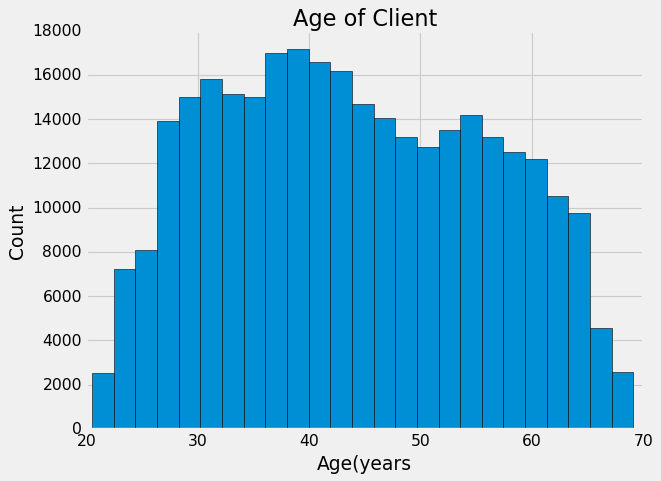

In [121]:
# 그래프 스타일을 먼저 세팅하자.
plt.style.use('fivethirtyeight')
# 원래는 fivethirtyeight 지만 Solarize_Light2, _classic_test_patch, bmh,classic,dark_background,fast 등이 있다.
# 이건 plt.style.avaliable 을 프린트하면 나온다.

# 연도별 연령 분포를 그래프로 그려보자.
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor='k',bins=25)
#bins는 입력된 숫자만큼 구간을 나누어 설정.
plt.title('Age of Client'); plt.xlabel('Age(years'); plt.ylabel('Count');

- outlier가 없다.
- age가 target에 미치는 영향을 시각화하자. 
- target값마다 다르게 색칠된 kernel density estimation plot(KDE)를 만들 것이다. 
- 각 데이터 지점에서 kernel(가우스)를 계산하고 평균내서 single smooth curve를 만든다. 
- Seaborn kdeplot을 이용한다.

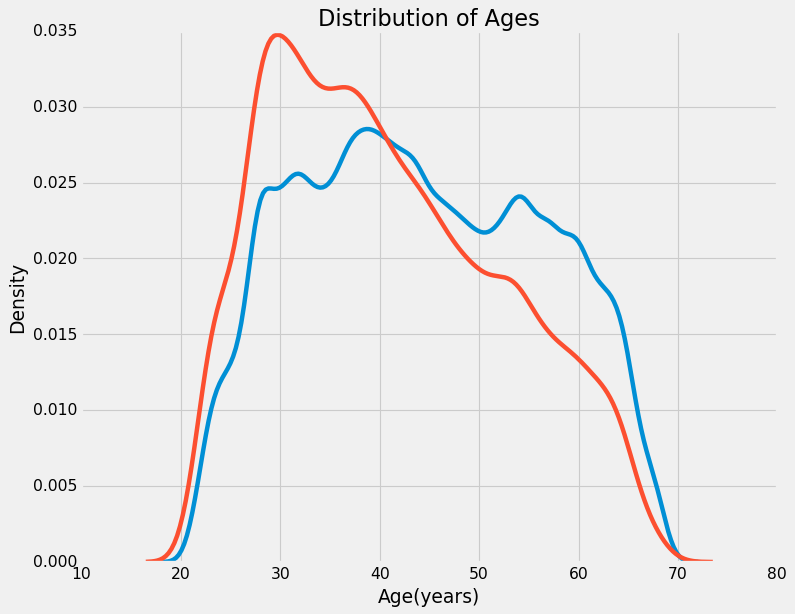

In [122]:
plt.figure(figsize=(10,8))
# 채무 이행자의 대출 KDE plot 
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'DAYS_BIRTH']/365, label='target==0')

# 채무 불이행자의 대출 KDE plot 
sns.kdeplot(app_train.loc[app_train['TARGET']==1, 'DAYS_BIRTH']/365, label='target==1')
# 그래프 라벨링
plt.xlabel('Age(years)'); plt.ylabel('Density');plt.title('Distribution of Ages');


- 음.. 왜 난 오른쪽 위에 각 색깔에 대한 label이 안나오지? 파란색은 target==0 이고 빨간색은 target==1이다.
- 이거 다시 해도 label이 안나오네 이유가 뭘까 ...
----------------------
- target==1은 왼쪽 끝으로 치우친다. 
- 연령대별 대출금 미상환 평균을 구하자.
- 나이를 5년 단위로 자르고 각 단위별로 평균값을 구한다.
- 그럼 연령대별 미상환 대출의 비율을 알 수 있다.

In [123]:
# 나이정보를 개별 데이터프레임으로 정리하자.
age_data=app_train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH']=age_data['DAYS_BIRTH']/365
#YEARS_BIRTH라는 열을 만들어서 DAYS_BIRTH/365값을 넣는다.

# 나이 데이터를 5년단위로 자르자.
age_data['YEARS_BINNED']=pd.cut(age_data['YEARS_BIRTH'],bins=np.linspace(20,70,num=11))
#여기서 num은 break point의 개수를 의미하기 때문에 (70-20)/5+1 해야 한다.
age_data.head(20)


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


- 5년 단위로 나누었으니 같은 것들 끼리 묶어서 평균을 내자.

In [124]:
# Group by the bin and calculate averages
age_groups=age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


- 그 다음 각 연령대별 대출 미상환 비율을 구하자.
- 그래프로 나타내보자.

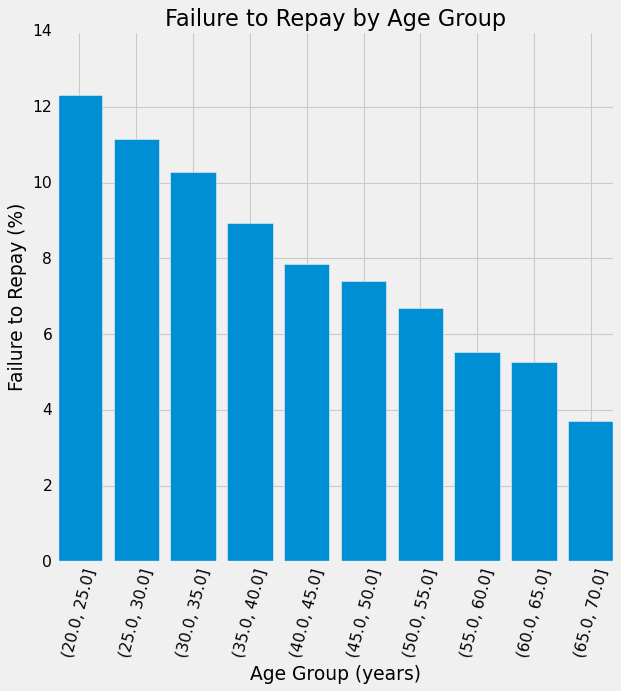

In [125]:
plt.figure(figsize=(8,8))
# 위에서 bin 별로 그룹화한거 바 그래프로 나타내자.
plt.bar(age_groups.index.astype(str),100*age_groups['TARGET'])
#astype: 넘파이 배열이나 판다스 데이터프레임의 타입을 바꾸는 함수
# int: 정수형, str: 문자형, float: 실수형, category: 범주형
# 변환 전후 타입을 확인하고 싶다면 df.info() 이용 가능!

# 그래프 라벨링
plt.xticks(rotation=75); plt.xlabel('Age Group (years)');
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');


- 그래프를 보면 분명히 어린 대출 신청자들이 대출금 미상환 비율이 높다.
- 은행은 어린 고객들에게 더 많은 안내와 재정계획을 제공해서 예방조치를 취해야 한다.

##### 3.5.2. Exterior Sources
- target과 가장 큰 음의 상관관계를 갖는 변수는 EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 이다. 
- 수많은 데이터 source를 이용해 만든 누적 신용등급같은 의미로 추정된다.
- 이를 살펴보자.
- 먼저 EXT_SOURCE feature와 target 사이의 상관관계를 보자.

In [126]:
# EXT_SOURCE 변수들을 추출하고 각각의 상관관계를 표시하자.
ext_data=app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs=ext_data.corr()
ext_data_corrs


,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


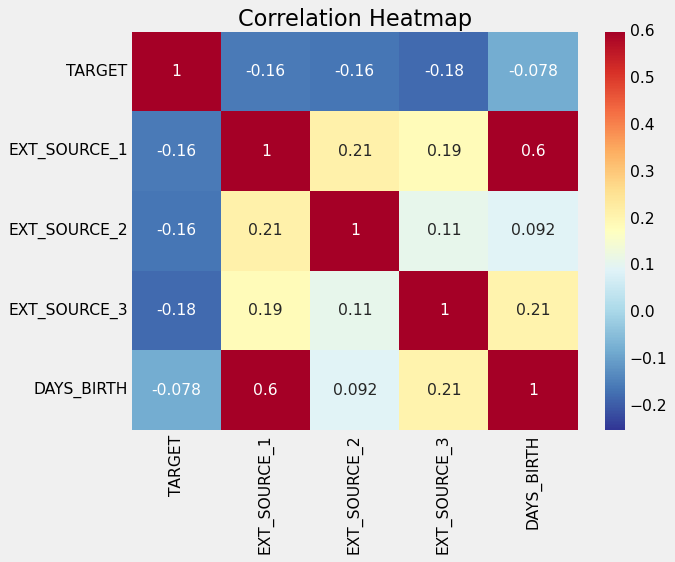

In [127]:
plt.figure(figsize = (8, 6))

# 알아보기 쉽게 그래프로 그려보자. 이런 경우는 Heatmap으로 나타내는 것이 좋다.
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
#vmin, vmax는 그래프상의 최소 최댓값을 말한다. 
#annot=True일 때 각 칸마다 숫자값을 써준다. False일 때는 숫자 없이 색깔만 있다.
plt.title('Correlation Heatmap');


- EXT_SOURCE feature가 target과 음의 상관관계를 가진다.
- 이는 EXT_SOURCE 값이 증가하면 대출 상환 가능성이 높아진다는 것을 나타낸다.
- TARGET 작아질수록 상환가능성 높음!! 어우 헷갈려
- target값에 따라 각 feature의 분포를 시각화하여 살펴보자.

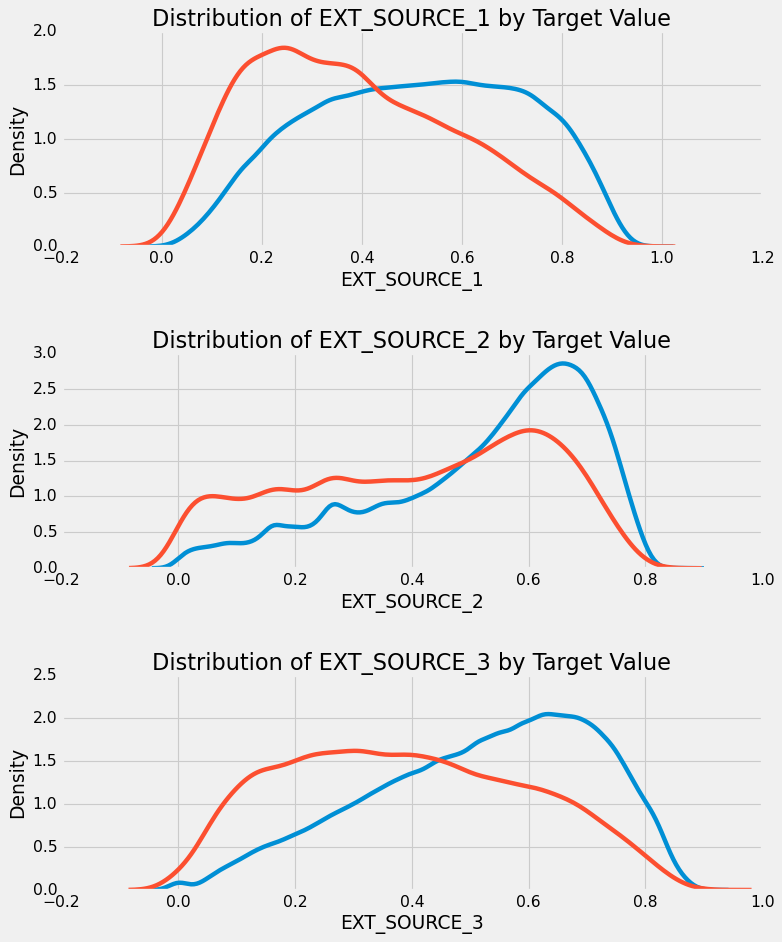

In [128]:
plt.figure(figsize=(10,12))

#source 마다 반복하자.
for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    #각 소스마다 새 그래프 만들기
    plt.subplot(3,1,i+1)
    # 상환 대출 그래프 그리기.
    sns.kdeplot(app_train.loc[app_train['TARGET']==0, source],label='TARGET==0')
    # 미상환 대출 그래프도 그리자.
    sns.kdeplot(app_train.loc[app_train['TARGET']==1, source],label='target==1')

    # 그래프 라벨링 하기.
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' %source);
    plt.ylabel('Density');
    plt.tight_layout(h_pad=2.5)



- 여기서도 라벨링이 안됨.. 왜 그러니 ㅠㅠ
- EXT_SOURCE_3는 TARGET과 가장 큰 차이가 난다.
- 이는 머신러닝 모델에서 신청자가 대출금을 제때 상환할지 예측에 유용하다.

##### 3.5.3. Pairs Plot
- 최종 exploratory plot으로 EXT_SOURCE 변수와 DAYS_BIRTH 변수의 pair plot을 만들 수 있다.
- Pair plot은 여러 변수 쌍 간의 관계를 확인할 수 있다.
- Seaborn과 PairGrid를 이용하여 산점도, 히스토그램, kernel density plot, 상관계수 plot을 만든다.

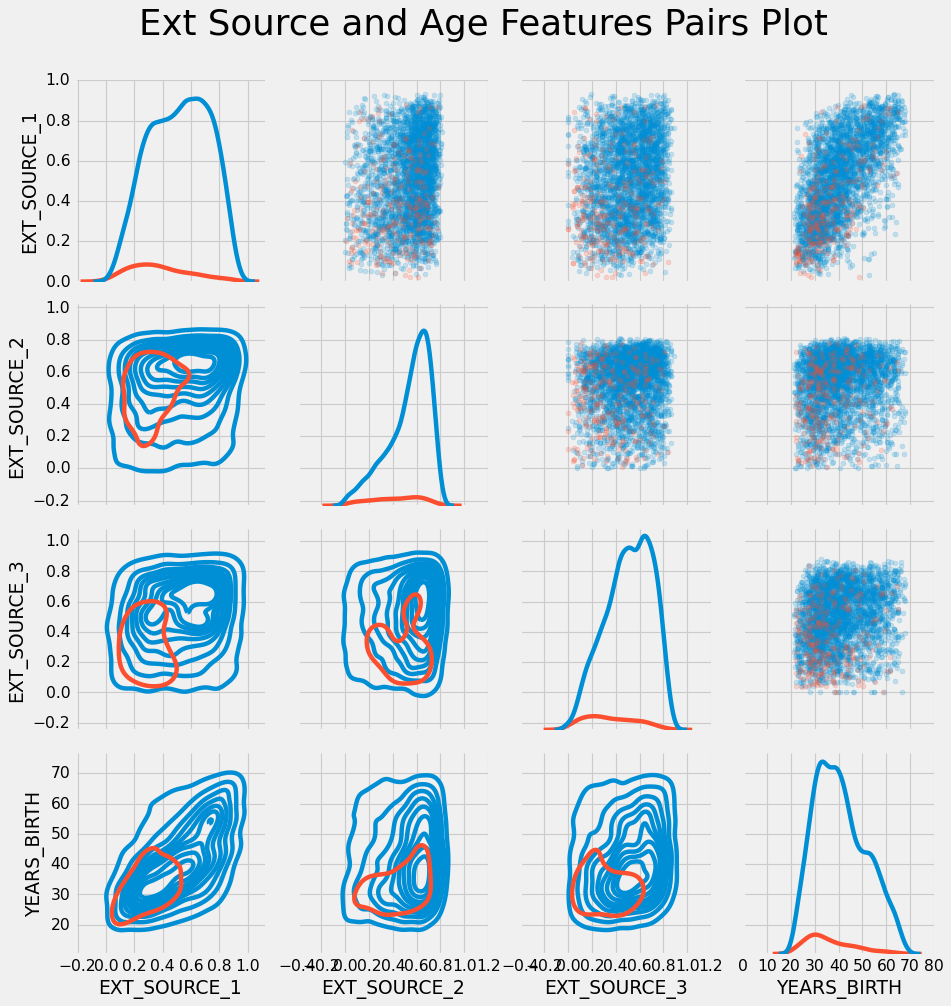

In [129]:
# 그래프 그리기 위해 데이터 복사해오기
plot_data=ext_data.drop(columns=['DAYS_BIRTH']).copy()

# 고객의 연령 추가
plot_data['YEARS_BIRTH']=age_data['YEARS_BIRTH']

# na 값을 자르고 첫 10000행으로 제한한다.>> 왜 첫 10000행만 쓰는가?
plot_data=plot_data.dropna().loc[:10000,:]

#두 행 사이의 상관계수 계산
def corr_func(x,y,**kwargs):
    r=np.corrcoef(x,y)[0][1]
    ax=plt.gca()
    ax.annotate("r={:.2f}".format(r), xy=(.2,.8), xycoords=ax.transAxes, size=20)

#pairgrid object 만들기
grid=sns.PairGrid(data=plot_data,size=3,diag_sharey=False,hue='TARGET',
                 vars=[x for x in list(plot_data.columns)if x!='TARGET'])
#sharey=True라고 치면 y축을 공유해서 grid를 만들 수 있다.
#마찬가지로 sharex도 있음!

#위에 있는건 산점도
grid.map_upper(plt.scatter,alpha=0.2)

#대각선에 있는건 히스토그램
grid.map_diag(sns.kdeplot)

#아래에 있는건 밀도 그래프(?)
grid.map_lower(sns.kdeplot,cmap=plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size=32, y=1.05);


- 이해 못한것 같은데 이해 못해도 된다고 하니까 일단 스킵..
- 같은 그래프모양이 나오지 않았다 ㅠㅠ
- 빨간색은 미상환 대출금, 파란색은 상환 대출금이다.
- EXT_SOURCE_1과 DAYS_BIRTH 사이에 양의 선형관계가 있다.

#### 5. Feature Engineering
- feature engineering은 construction과 selection을 포함한다.
----
1. feature construction: 기존 데이터로부터 새로운 feature 추가(feature 늘리기)
    - Polynomial features
    - Domain Knowledge features
2. feature selection: 중요한 feature만 고르거나 차원 축소 (feature 줄이기)

- 여기서는 간단한 feature construction 방법인 Polynomial features와 Domain knowledge features를 이용하겠다.

##### 5.1. Feature construction - Polynomial Features
- 기존 feature 간의 interaction 항, 기존 feature의 power feature를 만든다.
- 예시) EXT_SOURCE_1^2, EXT_SOURCE_2^2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_2^2 >>> interaction feature
- 두 변수 각각은 target에 영향을 미치지 않을 수 있지만 두 변수를 함께 결합하면 target과의 관계가 드러날 수도 있다.
- interaction feature는 통계 모델에서 다중 변수의 영향을 포착하기 위해 사용되지만 기계 학습에서는 자주 사용되지 않는다.
 > Jake VanderPlas- Python for Data Science 에서 Polynomial Feature에 대한 더 많은 정보를 얻을 수 있다.

- 다음은 EXT_SOURCE 변수와 DAYS_BIRTH 변수를 사용하여 Polynomial feature를 만든다.
- Scikit-Learn의 DanulicialFeatures 클래스를 이용한다.
- degree of 3를 이용하여 결과를 확인할 것이다. 
- degree에 따라 feature 수가 지수적으로 증가하므로 너무 높은 degree를 사용하지 않는다.

In [130]:
# polynomial feature를 위한 새 데이터프레임을 만든다.
poly_features=app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]
poly_features_test=app_test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

#결측치를 다루기위한 imputer
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

poly_target=poly_features['TARGET']

poly_features=poly_features.drop(columns=['TARGET'])

#결측치 impute 해야한다.
poly_features=imputer.fit_transform(poly_features)
poly_features_test=imputer.transform(poly_features_test)

#특정 degree로 polynomial object 만들기
from sklearn.preprocessing import PolynomialFeatures

poly_transformer=PolynomialFeatures(degree=3)

- cannot import name 'Imputer' from 'sklearn.preprocessing' 라는 오류가 떴는데 버전을 다시 설정해야한다고 한다. 그래서  from sklearn.impute import SimpleImputer 로 써서 해결해주었다.


In [131]:
#polynomial features 을 연습시키자.
poly_transformer.fit(poly_features)

# Transform the features
poly_features=poly_transformer.transform(poly_features)
poly_features_test=poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


- 상당히 많은 수의 새 feature가 생성되었다. 
- 이름을 알기 위해 get_feature_names method를 사용하자.

In [132]:
poly_transformer.get_feature_names(input_features=['EXT_DOURCE_1','EXT_SOUCE_2','EXT_SOURCE_3','DAYS_BIRTH'])[:15]

['1',
 'EXT_DOURCE_1',
 'EXT_SOUCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_DOURCE_1^2',
 'EXT_DOURCE_1 EXT_SOUCE_2',
 'EXT_DOURCE_1 EXT_SOURCE_3',
 'EXT_DOURCE_1 DAYS_BIRTH',
 'EXT_SOUCE_2^2',
 'EXT_SOUCE_2 EXT_SOURCE_3',
 'EXT_SOUCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

- 35개의 features가 있다. 이것들 중 하나라도 target과 correlation이 있는지 확인하자.

In [133]:
# 이 features들의 데이터 프레임을 만들자.
poly_features=pd.DataFrame(poly_features, 
columns=poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

#target에 추가하자.
poly_features['TARGET']=poly_target

#target과의 상관관계를 찾자
poly_corrs=poly_features.corr()['TARGET'].sort_values()

#가장 음의 상관관계를 가지는 것과 가장 양의 상관관계를 가지는 것들을 나타내자.
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


- 새로운 변수 중 일부는 원래 feature보다 target과의 correlation이 더 크다.
- 우리는 이것이 머신러닝 모델의 학습에 도움이 되는지 안되는지 알기 위해 이것을 시도하고 모델링한 것과 시도하지 않고 모델링한 것을 비교할 수 있다.
- 방금 구한 새 feature를 training data와 testing data에 추가하고 이 feature가 있는 모델과 없는 모델을 평가하자.

In [134]:
# test features들을 데이터 프레임에 넣자.
poly_features_test=pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

#polynomial feature 들을 training dataframe으로 합병하기
poly_features['SK_ID_CURR']=app_train['SK_ID_CURR']
app_train_poly=app_train.merge(poly_features, on='SK_ID_CURR',how='left')
# 'SK_ID_CURR'으로 합병. 방법은 왼쪽으로.

#polynomial features를 testing dataframe으로 합병.
poly_features_test['SK_ID_CURR']=app_test['SK_ID_CURR']
app_test_poly=app_test.merge(poly_features_test, on='SK_ID_CURR',how='left')

#합병 했으면 데이터프레임 정렬
app_train_poly,app_test_poly=app_train_poly.align(app_test_poly,join='inner',axis=1)

#새 shape를 프린트하자.
print('Training data with polynomial features shape: ',app_train_poly.shape)
print('Testing data with polynomial features shape: ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 274)
Testing data with polynomial features shape:  (48744, 274)


##### 5.2. Feature construction - Domain Knowledge Features
- 신용 전문가가 아니기 때문에 우리가 domain 지식을 갖고있지 않지만 "제한된 금융 지식을 적용하려는 시도"는 할 수 있다.
- 대출금 상환 여부에 중요하다고 생각되는 feature를 만들 수 있다.
- script by Aguiar에서 영감을 받은 5가지 feature들을 사용할 것이다.
----
1. CREDIT_INCOME_PERCENT: 크레딧 양 / 고객의 소득 퍼센트
2. ANNUITY_INCOME_PERCENT: 대출 연금 / 고객의 소득 퍼센트
3. CREDIT_TERM: 지급 기간=대출연금 / 크레딧양
4. DAYS_EMPLOYED_PERCENT: 고용된 날짜 / 고객 나이 퍼센트
5. 음? 5개라면서 4개뿐인걸?...

In [135]:
app_train_domain=app_train.copy()
app_test_domain=app_test.copy()

#트레이닝 데이터셋에 추가..
app_train_domain['CREDIT_INCOME_PERCENT']=app_train_domain['AMT_CREDIT']/app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT']=app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM']=app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT']=app_train_domain['DAYS_EMPLOYED']/app_train_domain['DAYS_BIRTH']

#테스트 데이터셋에 추가..
app_test_domain['CREDIT_INCOME_PERCENT']=app_test_domain['AMT_CREDIT']/app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT']=app_test_domain['AMT_ANNUITY']/app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM']=app_test_domain['AMT_ANNUITY']/app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT']=app_test_domain['DAYS_EMPLOYED']/app_test_domain['DAYS_BIRTH']




##### 5.2.1 Visualize New Variables
- 이러한 domain knowledge 변수들을 그래프로 나타내보자.
- 앞에서 했던 대로 target값에 따라 다른 색깔을 가지는 KDE Plot을 만들 것이다.

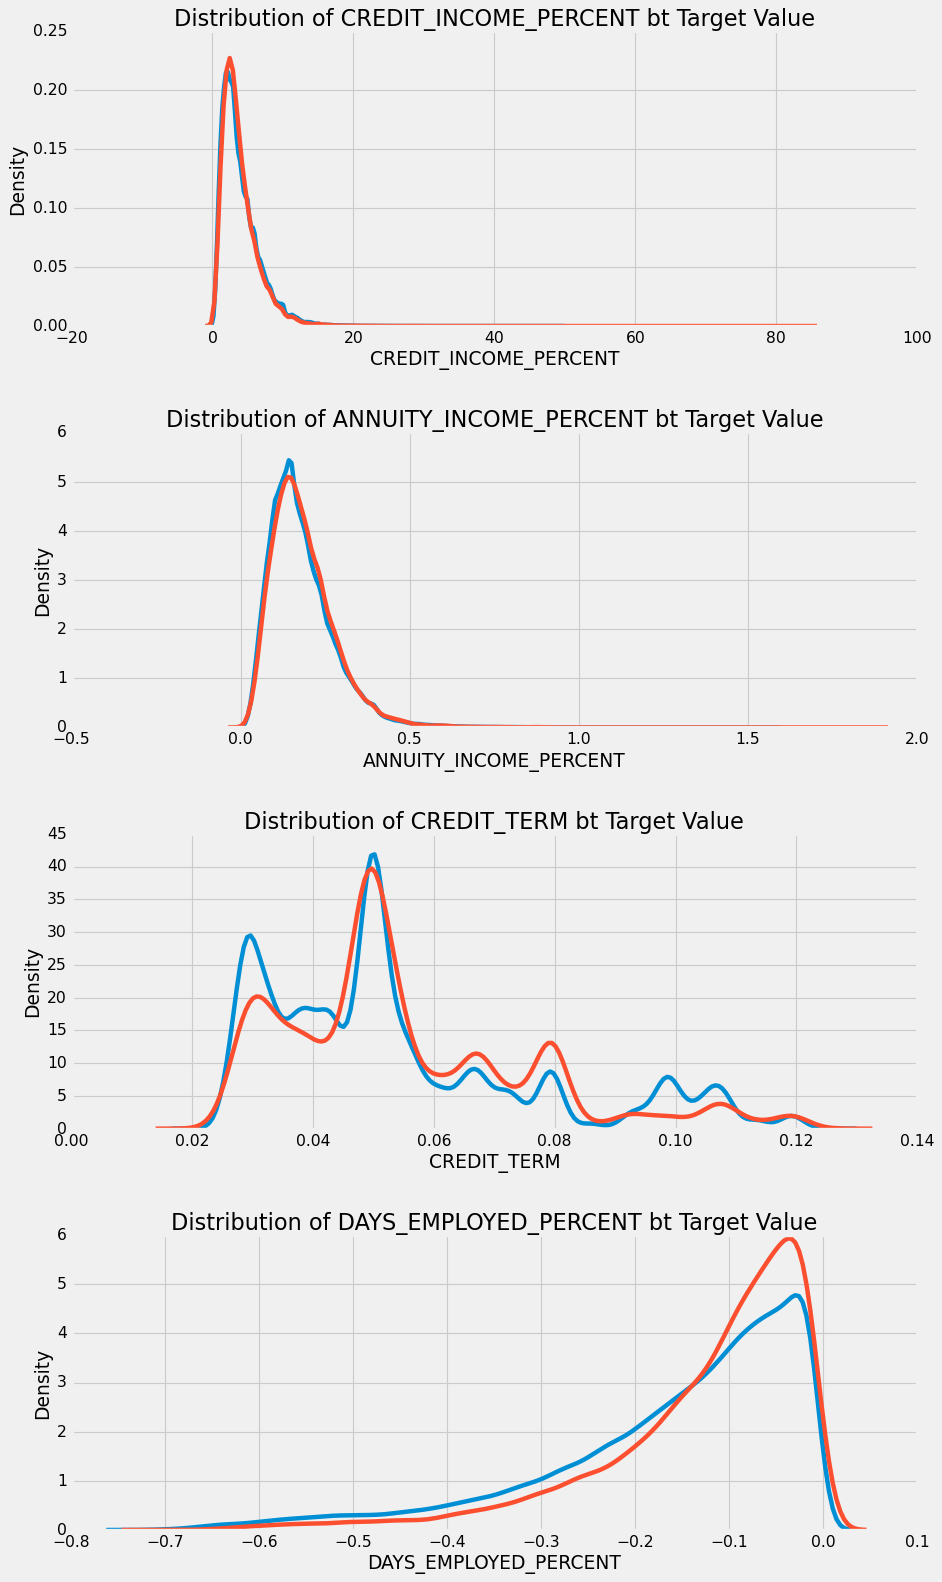

In [136]:
plt.figure(figsize=(12,20))
# new features 전부 다 반복
for i , feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']):
    #enumerate 열거한 개체들을 돌려주다.
    #각 소스당 새 subplot을 만들자.
    plt.subplot(4,1,i+1)
    # subplot 뒤에 숫자들은 행 개수, 열 개수, index
    
    #상환 대출 그래프를 그리자.
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0,feature],label='target==0')

    #대출 미상환 그래프를 그리자
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1,feature],label='target==1')

    #그래프 라벨링
    plt.title('Distribution of %s bt Target Value'% feature)
    plt.xlabel('%s'%feature)
    plt.ylabel('Density')

plt.tight_layout(h_pad=2.5)
# subplot들 사이의 여백 조정



- 이것들이 유용할지 사용해서 확인하자!

#### 6. Baseline
- 단순한 Baseline의 경우 test set의 모든 예에 대해 동일한 값을 추측할 수 있다.
- 검정 집합의 모든 관측치에 대해 0.5를 추측할 수도 있다.
- 이렇게 해버리면 AUC ROC이 0.5가 된다. <<아직 이게 뭔소린지 모르겠다.
- 실제 기준선을 위해 더 정교한 모델을 사용해 보자.

##### 6.1.Logistic Regression Implementation
- 여기서는 자세한 설명보다 모델 구현에 초점을 둔다.
 > 자세한 설명은 An Introduction to Statistical Learning, Hands-On Machine Learning with Scikit-Learn and TensorFlow 책을 참조해라.
 - Baseline을 얻기 위해 category 변수를 인코딩하고 모든 feature를 사용할 것이다.
 - 결측값을 채우고(Imputation) feature의 범위를 정규화해서(feature scaling) 데이터를 사전 처리하자.

In [138]:
from sklearn.preprocessing import MinMaxScaler

# 트레이닝 데이터에서 타겟을 자르자.
if 'TARGET' in app_train:
    train=app_train.drop(columns=['TARGET'])
else:
    train=app_train.copy()

#Feature 이름들
features=list(train.columns)

#테스팅 데이터를 복사하자.
test=app_test.copy()

#결측값을 중앙값으로 채우자.
imputer=SimpleImputer(strategy='median')

#각 feature 를 0~1로 scale하자.
scaler=MinMaxScaler(feature_range=(0,1))

#train data에 imputer 장착
imputer.fit(train)

#트레이닝 데이터와 테스팅 데이터 둘 다 결측치 변환
train=imputer.transform(train)
test=imputer.transform(app_test)

# 스칼라로 반복 (??????)
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ',test.shape)


Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


- 첫번째 model에서는 Scikit-Learn의 LogisticRegression을 사용한다.
- 본래 model 세팅에서 우리가 바꿀 수 있는 것은 overfitting의 양을 제어하는 정규화 매개변수 c를 낮추는 것이다. 
- 이렇게 하면 기본 로지스틱 회귀분석보다 약간 더 나은 결과를 얻을 수 있지만 이후 모델에서도 여전히 작은 값을 세팅해야할 것이다.
----
- 친숙한 사이킷런 모델링 구문을 사용하자.
- 모델을 만들고 .fit을 사용하여 모델을 train한다.
- .predict_proba를 사용하여 test data를 예측한다. (0 또는 1 말고 확률로!)

In [139]:
from sklearn.linear_model import LogisticRegression

#특정 정규화된 파라메터로 모델 만들자.
log_reg=LogisticRegression(C=0.001)
# C값은 정규화 강도의 역수. 값이 작을수록 정규화가 강화된다.

#training data를 연습시키자.
log_reg.fit(train,train_labels)

LogisticRegression(C=0.001)

- 이제 모델이 train 되었으니 예측에 사용할 수 있다.
- 대출금을 지불하지 않을 확률을 예측하기 위해 .predict_proba 메서드를 이용한다.
- 이 메서드는 관측치의 수x2 배열을 반환한다.
- 첫 번째 열은 target이 0일 확률이고 두 번째 열은 target이 1일 확률이다.
- 대출금이 상환되지 않을 확률은 두 번째 열이다.
- 아래에서 예측하고 올바른 열을 선택하자.

In [140]:
#  예측하고 두번째 열만 선택하자.
log_reg_pred=log_reg.predict_proba(test)[:,1]

- 예측은 sample_submission.csv 파일에 표시된 형식이어야 한다.
- 여기서 열은 SK_ID_CURR and TARGET 두 개이다.
- 우리는 test set과 submit이라 불리는 예측으로 이런 형식의 dataframe을 만들 것이다.

In [141]:
#데이터프레임을 제출물로 만들기(?)

submit=app_test[['SK_ID_CURR']]
submit['TARGET']=log_reg_pred
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.091636
1,100005,0.260545
2,100013,0.067662
3,100028,0.080621
4,100038,0.176859


- 이 예측은 대출금이 상환되지 않을 확률을 나타낸다.
- 이러한 예측을 사용하여 신청자를 분류하면 대출을 해주면 안되는 사람을 결정하기 위한 probability threshold를 설정할 수 있다.

In [142]:
# 이 제출물을 csv 파일로 저장하자.
submit.to_csv('log_reg_baseline.csv',index=False)

- 이제 submission이 노트북이 실행중인 가상환경에 저장되었다.
- submission에 접근하기 위해 노트북 끝에 커널 오른쪽 위에 파란색 commit&run 버튼을 누를 것이다. 
- 이렇게 하면 전체 노트북이 실행된 다음 실행 중에 생선된 모든 파일을 다운로드할 수 있다.
----
- 노트북을 실행하면 Output sub tab 아래의 versions tab에서 이 파일들을 이용할 수 있다. 
- 제출파일은 대회에 제출하거나 다운로드할 수 있다.
- 로지스틱 회귀 분석 Baseline은 제출시 약 0.671점을 받아야 한다.

##### 6.2. Improved Model: Random Forest
- baseline의 저조한 성능을 극복하기 위해 알고리즘을 업데이트 하자.
- 동일한 training data에서 랜덤 포레스트를 사용하면 성능에 어떤 영향을 미치는지 알아보자.
- 랜덤 포레스트는 우리가 수백 그루의 나무를 사용할 때 훨씬 더 강력하다.
- 우리는 랜덤 포레스트의 100그루의 나무를 이용할 것이다.

In [144]:
from sklearn.ensemble import RandomForestClassifier

#랜덤 포레스트 classifier 만들자
random_forest=RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)
#n_estimator 나무 개수 verbose 상세도 제어 random state 피쳐 샘플링 제어

#트레이닝 데이터를 연습시키자.
random_forest.fit(train, train_labels)

#feature importance 추출하기
feature_importance_values=random_forest.feature_importances_
feature_importances= pd.DataFrame({'feature':features, 'importance':feature_importance_values})

#데스트 데이터로 예측하자.
predictions=random_forest.predict_proba(test)[:,1]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [146]:
#데이터프레임 제출물 만들기
submit=app_test[['SK_ID_CURR']]
submit['TARGET']=predictions

# 제출물 저장하기
submit.to_csv('random_forest_baseline.csv',index=False)


- 이러한 예측은 우리가 전체 노트북을 실행했을때도 알 수 있을 것이다.
- 이 모델은 제출했을 때, 0.678점을 받는다.

##### 6.3 Make Predictions using Engineered Features
- Polynomial Features and Domain knowledge가 모델을 개선했는지 여부를 확인하려면 이렇게 얻은 feature들을 test 모델에 교육하면 된다. 
- 그런 다음 제출 성능을 비교하여 feature engineering의 효과를 측정할 수 있다.


In [151]:
poly_features_names=list(app_train_poly.columns)

#polynomial features impute하기
imputer=SimpleImputer(strategy='median')

poly_features=imputer.fit_transform(app_train_poly)
poly_features_test=imputer.transform(app_test_poly)

#polynomial feature들 scale하기(0~1 사이로)
scaler=MinMaxScaler(feature_range=(0,1))

poly_features=scaler.fit_transform(poly_features)
poly_features_test=scaler.transform(poly_features_test)

random_forest_poly=RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

#트레이닝 데이터 연습시키기
random_forest_poly.fit(poly_features,train_labels)

#테스트 데이터로 예측하기
predictions=random_forest_poly.predict_proba(poly_features_test)[:,1]

#데이터프레임 제출물 만들기
submit=app_test[['SK_ID_CURR']]
submit['TARGET']=predictions

#제출물 저장하기! 이 과정은 거의 계속 비슷한 것 같다.
submit.to_csv('random_forest_baseline_engineered.csv', index=False)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


- 이 모델은 제출하면 0.678 점을 받는데, 이는 feature engineering을 하지 않은 모델과 정확히 같다.
- 따라서 우리는 이 feature engineering이 이 경우에는 도움이 되지 않았음을 알 수 있다.


##### 6.4 Testing Domain Features
- 이제 우리가 직접 만든 도메인 기능을 테스트하자.

In [152]:
app_train_domain=app_train_domain.drop(columns='TARGET')
domain_features_names=list(app_train_domain.columns)

# 도메인지식으로 추가한 feature들 impute하기
imputer=SimpleImputer(strategy='median')

domain_features=imputer.fit_transform(app_train_domain)
domain_features_test=imputer.transform(app_test_domain)

#도메인 지식으로 추가한 feature들 scale 하기
scaler=MinMaxScaler(feature_range=(0,1))

domain_features=scaler.fit_transform(domain_features)
domain_features_test=scaler.transform(domain_features_test)

random_forest_domain=RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

#트레이닝 데이터 연습시키기
random_forest_domain.fit(domain_features,train_labels)

#feature importance 추출하기
feature_importance_values_domain=random_forest_domain.feature_importances_
feature_importances_domain=pd.DataFrame({'feature':domain_features_names, 'importance':feature_importance_values_domain})

#테스트 데이터로 예측해보자.
predictions=random_forest_domain.predict_proba(domain_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


In [153]:
#제출물 만들기
submit=app_test[['SK_ID_CURR']]
submit['TARGET']=predictions

#제출물 저장하기
submit.to_csv('random_forest_baseline_domain.csv',index=False)

- 이 점수는 0.679이다.
- engineering feature가 이 모델에 도움이 되지 않는다는 것을 알 수 있다.
- (그러나 노트북 끝에 Gradient Boosting Model에서는 도움이 된다.)
- 이후 노트북에서는 다른 데이터 소스의 정보를 사용해서 feature engineering을 더 많이 수행할 것이다. 그것들은 분명 도움이 될 것이다.



##### 6.5. Model Interpretation: Feature Importances
- 어떤 변수가 가장 관련성이 높은지 확인하기 위해 랜덤포레스트의 feature importance를 살펴보자.
- EDA에서 본 상관관계를 고려하면 가장 중요한 feature는 EXT_SOURCE와 DAYS_BIRTH이다. 
- 이러한 feature importance를 차원 축소의 방법으로 이용할 수도 있다.

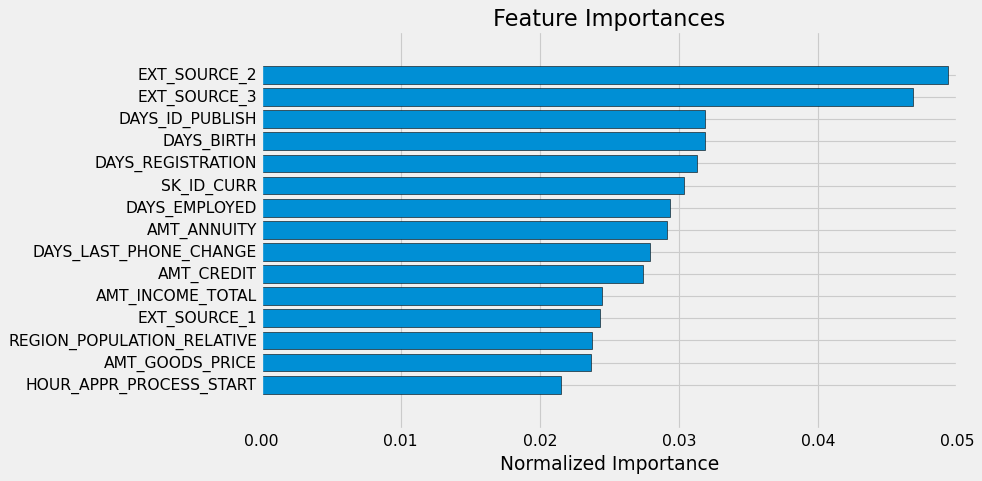

In [161]:
def plot_feature_importances(df):
     
        # 중요도에 따라 feature 분류하기
        df = df.sort_values('importance', ascending = False).reset_index()

        #feature의 중요도를 정규화하자.
        df['importance_normalized']=df['importance']/df['importance'].sum()

        #바 그래프를 그리자.
        plt.figure(figsize=(10,6))
        ax=plt.subplot()

        #가장 중요한게 맨 위에 오도록 그래프를 뒤집자.
        ax.barh(list(reversed(list(df.index[:15]))), df['importance_normalized'].head(15), align='center',edgecolor='k')
        #barh는 막대 그래프를 그리는 코드.

        #yticks 와 라벨 설정하자.
        ax.set_yticks(list(reversed(list(df.index[:15]))))
        ax.set_yticklabels(df['feature'].head(15))

        #Plot labeling
        plt.xlabel('Normalized Importance')
        plt.title('Feature Importances')
        plt.show()

        return df

#default features에 대한 feature importance를 보여주자.
feature_importances_sorted=plot_feature_importances(feature_importances)


- 예상대로, 가장 중요한 feature들은 EXT_SOURCE와 DAYS_BIRTH를 다루는 feature들이다.
- 모델에 매우 중요한 feature는 몇 개밖에 없다.
- 이는 성능 저하 없이 많은 feature를 삭제할 수 있고 성능도 향상될 수 있다는 뜻이다.
- feature importance는 모델 해석이나 차원 축소의 가장 정교한 방법은 아니지만 모델이 예측할 때 어떤 요소를 고려하는지 이해할 수 있다.

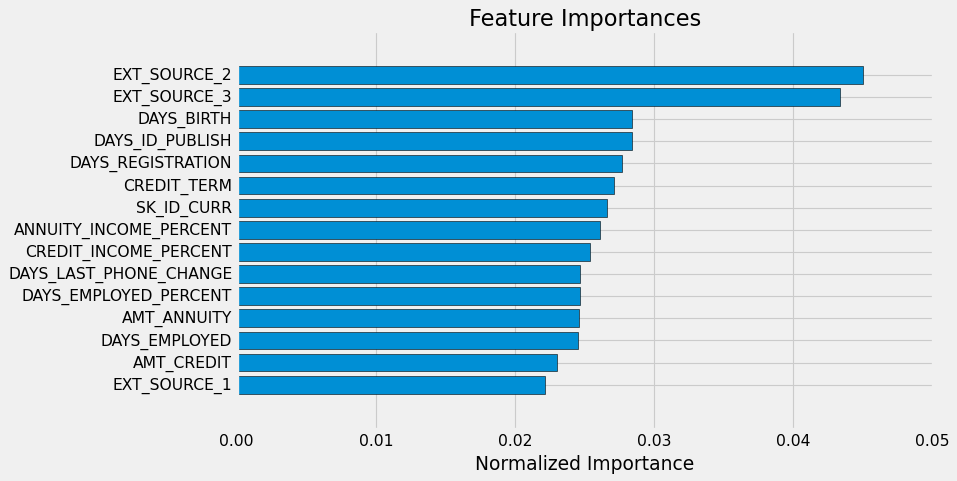

In [164]:
feature_importances_domain_sorted=plot_feature_importances(feature_importances_domain)

- 우리의 4가지 hand-engineered features 모두 상위 15개의 가장 중요한 features에 포함되었다.
- 이는 우리의 도메인 지식이 최소한 정상이라는 확신을 준다.

#### 7. Conclusions
- 간단한 EDA를 진행하여 모델링에 도움이 될 수 있는 관계, 추세, 이상 징후를 식별하려고 했다.
- 이 과정에서 categorical 변수 인코딩, 결측값 imputing, feature들 scaling 같은 전처리를 실행했다.
- 데이터 탐색, 데이터 준비, feature engineering 끝나면 baseline model을 구현한다.
- 그 후에는 조금 더 복잡한 모델을 구현했다.
- engineering 변수 추가의 효과가 있는지 결정하는 실험도 수행했다.
----
- 머신러닝 프로젝트의 일반적인 개요
1. 문제와 데이터 이해
2. 데이터 정리 및 formatting
3. EDA
4. baseline model
5. improved model
6. model interpretation
- 머신러닝 대회는 최고성능 달성에만 관심이 있고 해석에는 관심이 없다.
- 그러나 모델이 결정을 내리는 방법을 이해하려고 시도해서 모델을 개선하거나 오류를 검사할 수 있다.
- 다음 노트북에서는 더 많은 데이터 소스를 통합하고 더 복잡한 모델을 구축하여 점수를 높일 것이다.